In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RB
#from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE as SM
from sklearn.ensemble import RandomForestRegressor as RF,GradientBoostingRegressor as GB,ExtraTreesClassifier as ET
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import random

In [2]:
df1=pd.read_csv("file1clean.csv")
df2=pd.read_csv("file2clean.csv")
df3=pd.read_csv("file4clean.csv")
df4=pd.read_csv("file5clean.csv")
df5=pd.read_csv("file6clean.csv")

In [3]:
len(df2)+len(df3)+len(df4)+len(df5)

3206

In [49]:
df=pd.concat([df2,df3,df4,df5])

In [50]:
df=df.drop('Unnamed: 0',axis=1)

In [51]:
l=df.columns.tolist()[1:]

In [52]:
X=df[l]

In [8]:
#pca=PCA(n_components=50)
#X1=pca.fit_transform(X)

In [60]:
X.shape

(3206, 25728)

In [61]:
clf=KMeans(n_clusters=5)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
centroids=clf.cluster_centers_
labels=clf.labels_
colors=["g.","r.","c.","b.","k.","o."]

In [63]:
t=clf.predict(X)

In [64]:
t=t.tolist()

In [65]:
l=labels.tolist()

In [66]:
for i in range(5):
    print(l.count(i))

22
3012
27
8
137


In [67]:
X["labels"]=labels

In [68]:
X1=X[X["labels"]==1]

In [69]:
X1=X1.drop(["labels"],axis=1)

In [70]:
len(centroids[1])

25728

In [71]:
l=[]
for i in range(3012):
    l.append(X1.iloc[i]) 

In [72]:
t1=list((np.array(l) - np.array(centroids[1]))**2)

In [73]:
l2=[]
for i in t1:
    l2.append(np.sqrt(np.sum(i)))

In [74]:
mean=np.mean(l2)

In [75]:
max(l2),min(l2)

(455.3305825927183, 39.280490941438615)

In [81]:
len(X1)

3012

In [78]:
c=0
for i in l2:
    if i<=90:
        c+=1
c

1552

In [79]:
k=X1.columns.tolist()[500:700]

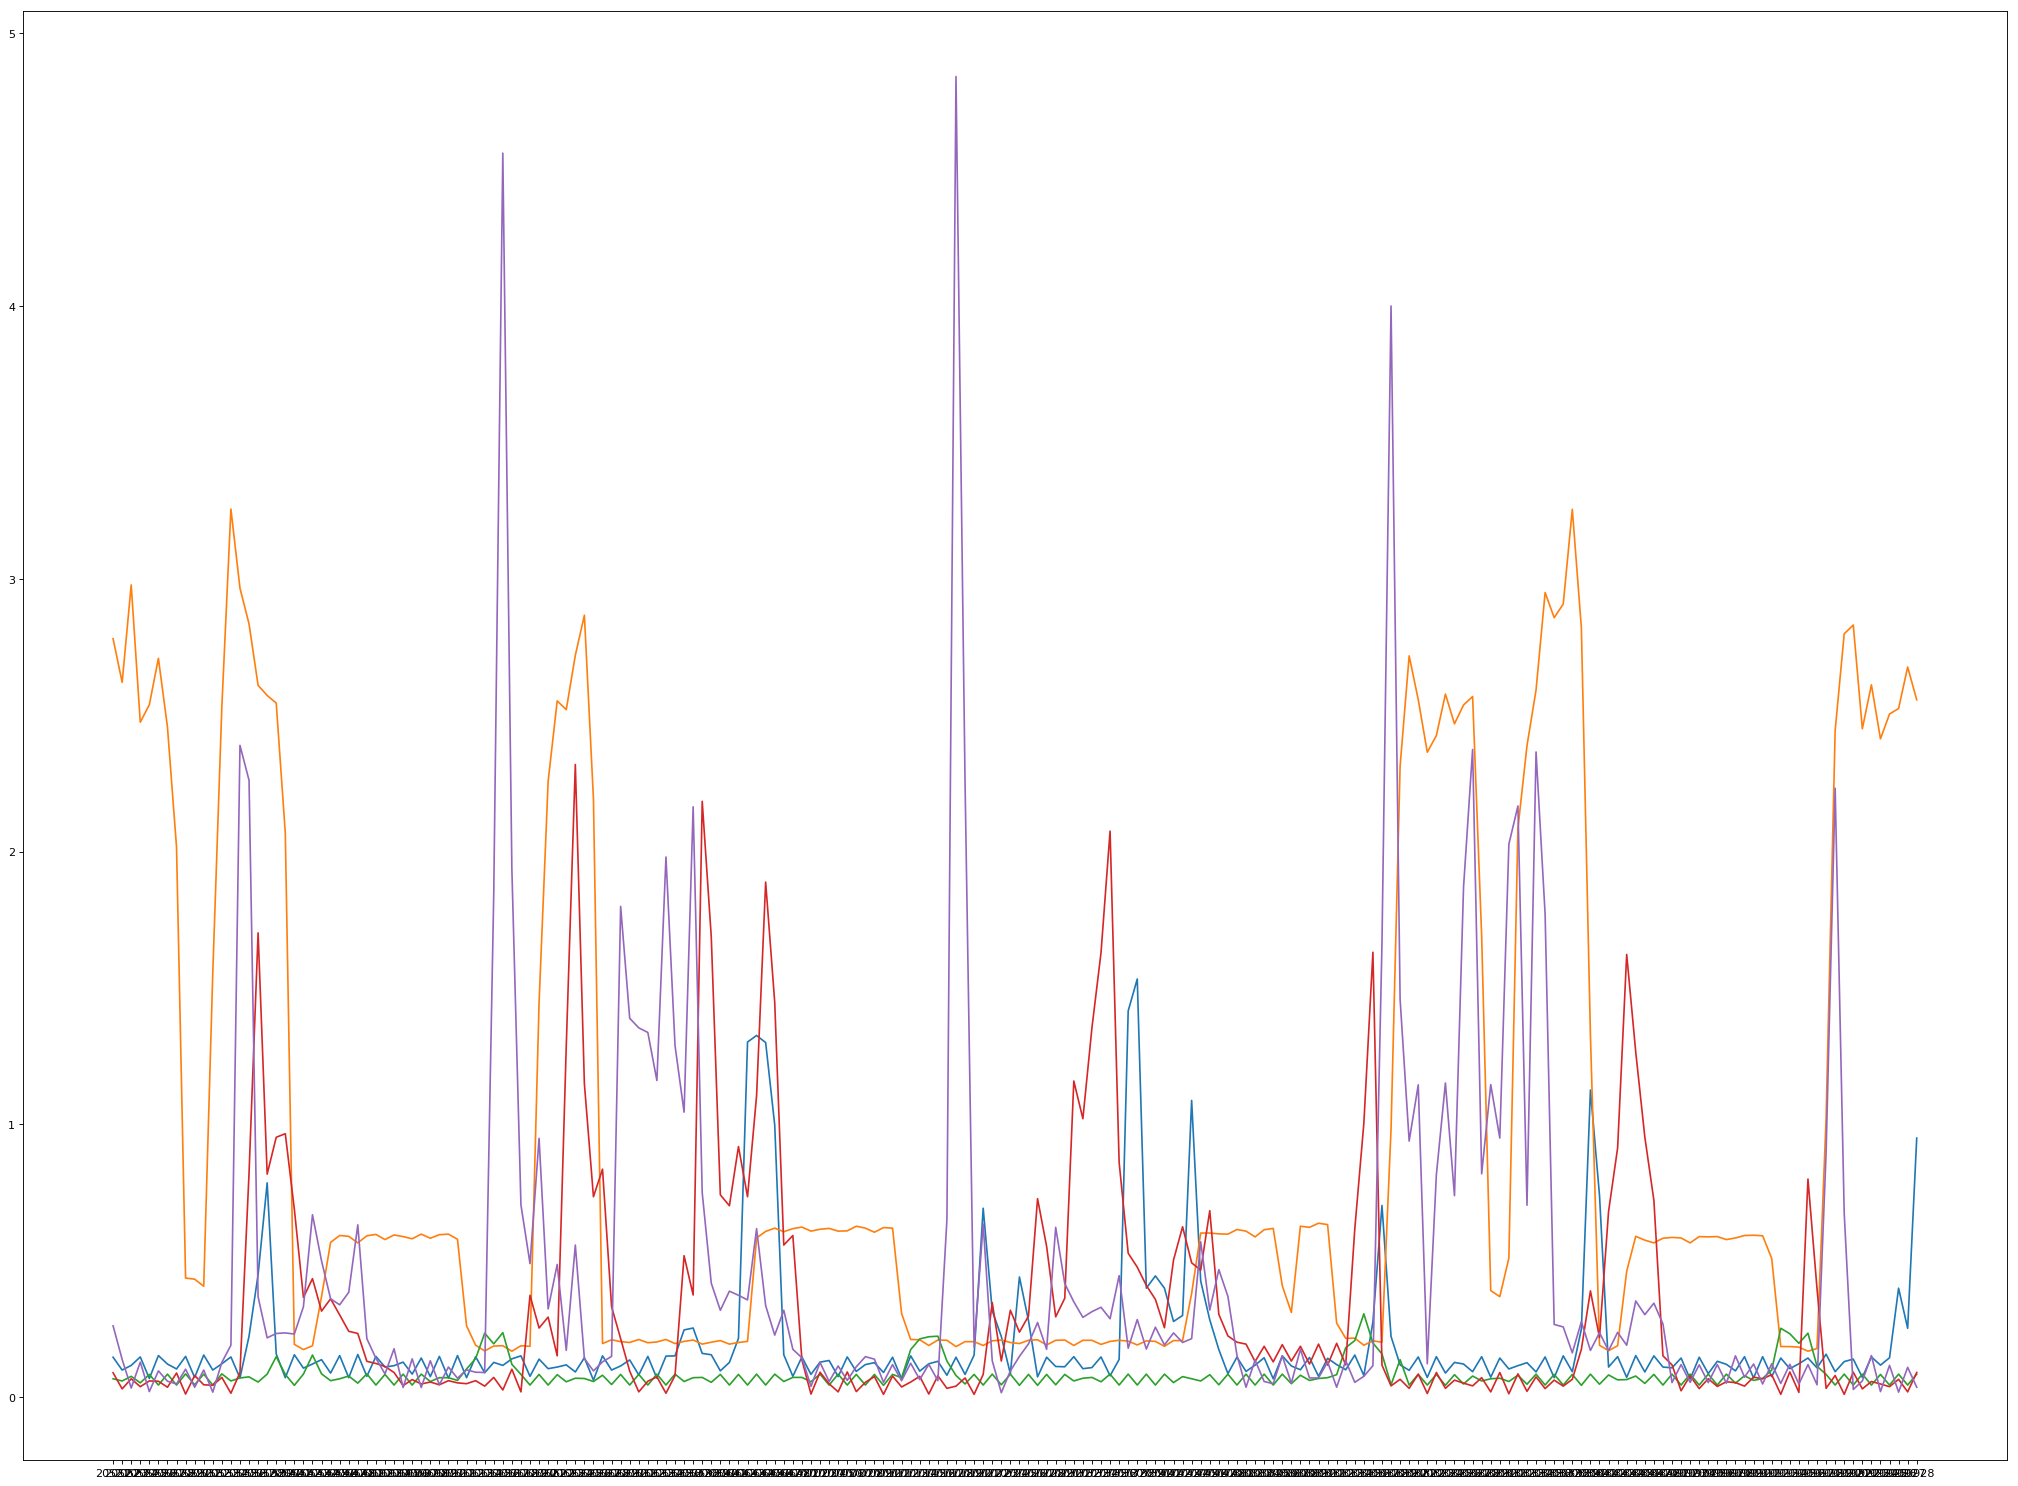

In [82]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(32,24), dpi=80, facecolor='w', edgecolor='k')
for i in range(2000,2005):
    plt.plot(k,X1.iloc[i][k])
    #plt.plot(k,X1.iloc[i-2000][k])

(array([1.125e+03, 1.275e+03, 4.290e+02, 1.340e+02, 3.600e+01, 6.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([ 39.28049094,  80.88550011, 122.49050927, 164.09551844,
        205.7005276 , 247.30553677, 288.91054593, 330.5155551 ,
        372.12056426, 413.72557343, 455.33058259]),
 <a list of 10 Patch objects>)

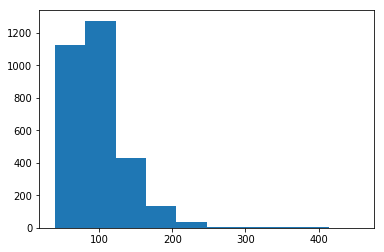

In [83]:
plt.hist(l2)

In [84]:
X1["distance"]=l2

In [85]:
X2=X1[X1["distance"]<90]

In [86]:
X3=X2.drop("distance",axis=1)

In [87]:
X3=X3.reset_index()
X3=X3.drop('index',axis=1)

In [88]:
g=X3.columns.tolist()

In [192]:
q=pd.DataFrame()

In [193]:
for i in range(1,537):
    q[i]=X3[g[(i-1)*48:i*48]].mean(axis=1)

In [195]:
#random.uniform(-0.5,0.5)
#len(X3)


In [196]:
q1=q.copy()

In [197]:
q1=q1.iloc[:500]

In [114]:
#for i in range(1,537):
#    for j in range(len(q1[i])):
#        q1[i][j]=q1[i][j]*random.uniform(0,0.5)

In [202]:
for i in range(500):
    l1=q1.iloc[i].tolist()
    #k=np.mean(l1)
    for j in range(len(l1)):
        l1[j]=random.uniform(0,0.5)*l1[j]
    q1.iloc[i]=l1   

In [206]:
#q actual genuine
#q1 first bogus data
#q2  2nd bogus
#q3 3rd bogus

In [207]:
q2=q.copy()

In [208]:
q2=q2.iloc[501:1050]

In [209]:
len(q2.iloc[0])

536

In [214]:
for i in range(549):
    l1=q2.iloc[i].tolist()
    #k=np.mean(l1)
    for j in range(len(l1)):
        l1[j]=random.uniform(0.1,0.8)*l1[j]
    q2.iloc[i]=l1   

In [215]:
#for i in range(1552):
#    w=random.sample(range(0,536),105)
#    l1=q2.iloc[i]
#    for j in w:
#        l1[j]=0
#    q2.iloc[i]=l1   

In [137]:
#q2=q.mul(q.mean(axis=1),axis=0)


In [129]:
#e=(q2== 0).astype(float).sum(axis=1).tolist()

In [383]:
q3=q.copy()

In [384]:
q3=q3[1051:]

In [385]:
len(q3)

501

In [387]:
for i in range(501):
    l1=q3.iloc[i]
    k=np.mean(l1)
    for j in range(len(l1)):
        l1[j]=random.sample(range(1,5),1)[0]*k
    q3.iloc[i]=l1   

In [388]:
for i in range(501):
    l1=q3.iloc[i].tolist()
    k=random.sample(range(0,536),100)
    for j in k:
        l1[j]=random.uniform(0.1,0.9)*l1[j]
    q3.iloc[i]=l1   

In [220]:
q["label"]=0

In [221]:
q1["label"]=1

In [222]:
q2["label"]=1

In [389]:
q3["label"]=1

In [390]:
#q3=q3.drop("label",axis=1)

In [391]:
t=pd.concat([q,q1,q2,q3])

In [392]:
d=t.columns.tolist()

In [393]:
d=d[:-1]

In [394]:
X=t[d]
Y=t["label"]

In [395]:
len(t)

3102

In [396]:
Y.tolist()[1600]

1

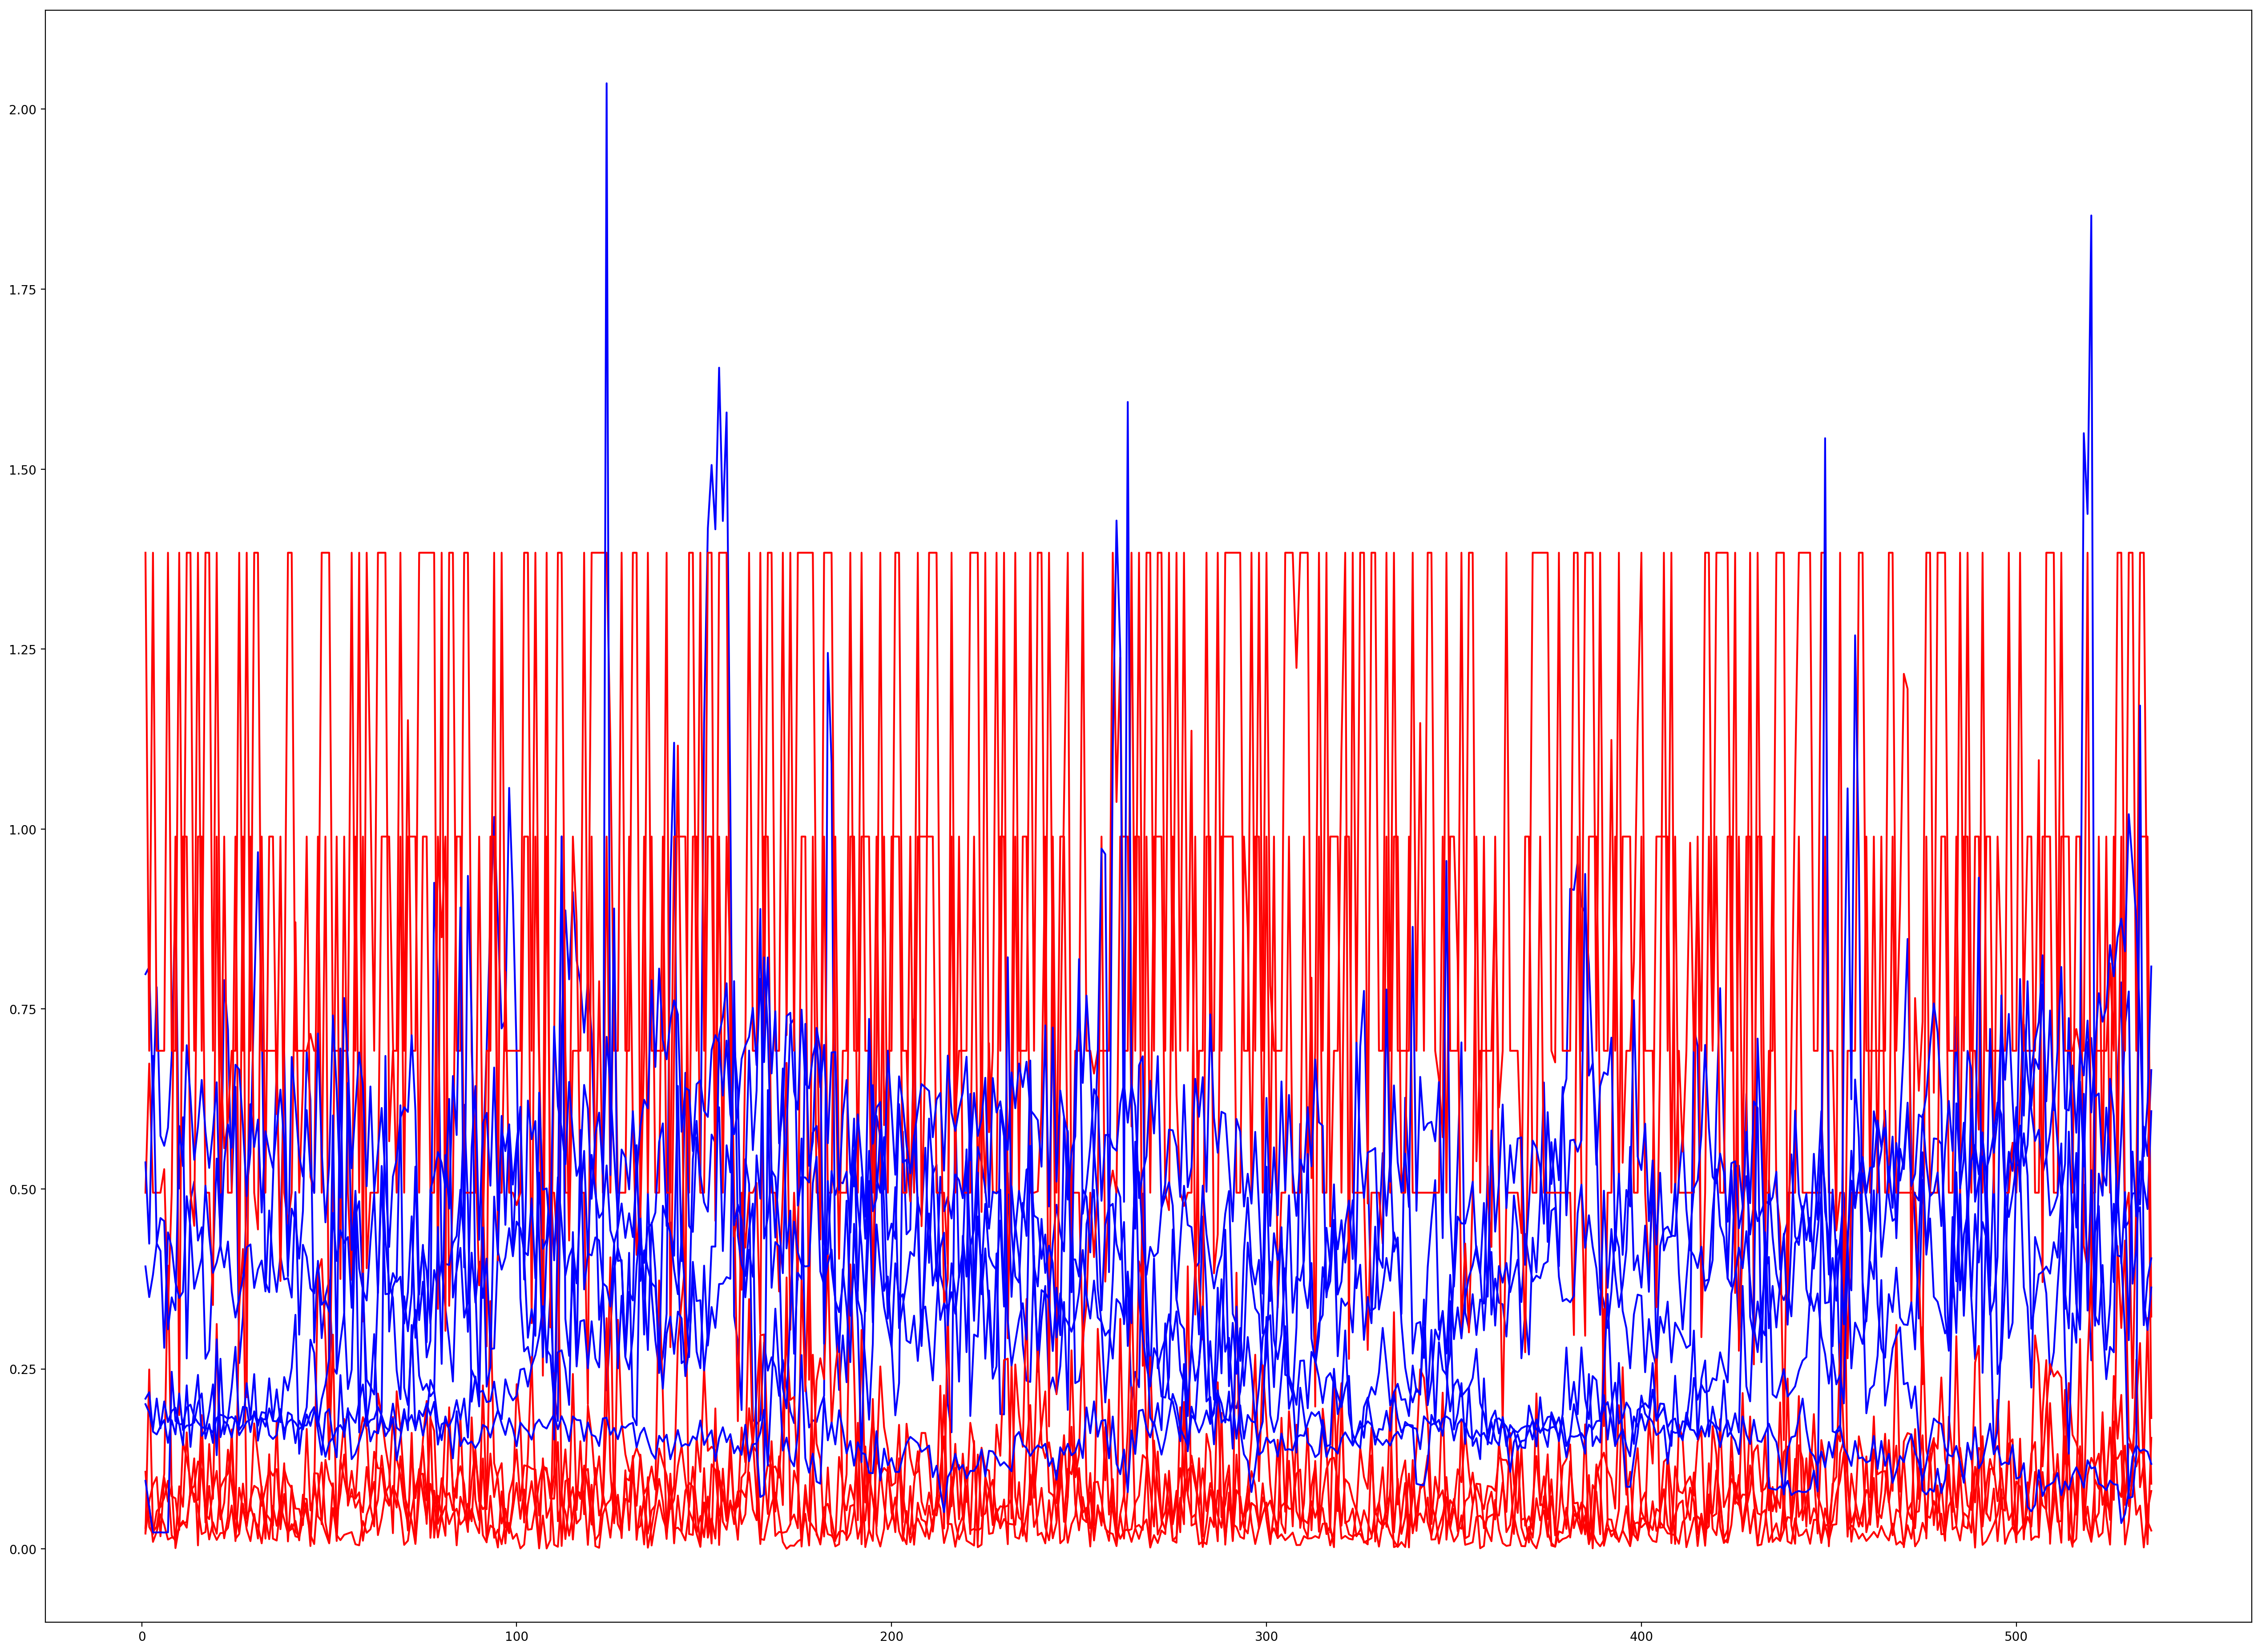

In [376]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(32,24), dpi=200, facecolor='w', edgecolor='k')
fig = plt.gcf()
#for i in range(600,603):
plt.plot(d,X.iloc[600][d],c='b')
plt.plot(d,X.iloc[1600][d],c='r')
plt.plot(d,X.iloc[2100][d],c='r')
plt.plot(d,X.iloc[2800][d],c='r')
plt.plot(d,X.iloc[601][d],c='b')
plt.plot(d,X.iloc[1601][d],c='r')
plt.plot(d,X.iloc[2101][d],c='r')
plt.plot(d,X.iloc[2801][d],c='r')
plt.plot(d,X.iloc[602][d],c='b')
plt.plot(d,X.iloc[603][d],c='b')
plt.plot(d,X.iloc[604][d],c='b')
plt.plot(d,X.iloc[605][d],c='b')
#fig.savefig('thirtattempt1.png', dpi=200)

In [406]:
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(32,24), dpi=80, facecolor='w', edgecolor='k')
#for i in range(2000,2005):
#    plt.plot(d,X.iloc[i][d])
#    plt.plot(d,X.iloc[i-2000][d])

In [397]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [207]:
sm=SM(random_state=42)
#X_tr,Y_tr=sm.fit_sample(X_train,Y_train)
X_tr,Y_tr=sm.fit_sample(X_train,Y_train)

In [398]:
model=ET(n_estimators=100)
model.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [399]:
model.score(X_test,Y_test)

0.9259259259259259

In [405]:
l1=model.predict(X_test)
Y_test=np.asarray(Y_test).tolist()
c=0
for i in range(len(l1)):
    if Y_test[i]==0:
        c+=1
print(c)

304


In [401]:
f1_score(Y_test,l1)

0.927899686520376